In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read the data
crime = pd.read_csv("Crimes_2012_to_2015.csv")

In [3]:
# See first few rows of the data
crime.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10433096,HZ170962,1/1/2012 0:00,026XX N MC VICKER AVE,1562,SEX OFFENSE,AGG CRIMINAL SEXUAL ABUSE,RESIDENCE,True,False,...,29.0,19.0,17,NaN,NaN,2012,5/11/2016 15:48,NaN,NaN,NaN
1,10433124,HZ170983,1/1/2012 0:00,026XX N MC VICKER AVE,1544,SEX OFFENSE,SEXUAL EXPLOITATION OF A CHILD,RESIDENCE,True,False,...,29.0,19.0,17,NaN,NaN,2012,5/11/2016 15:48,NaN,NaN,NaN
2,10532867,HZ276514,1/1/2012 0:00,036XX S RHODES AVE,1563,SEX OFFENSE,CRIMINAL SEXUAL ABUSE,APARTMENT,False,False,...,4.0,35.0,17,NaN,NaN,2012,5/26/2016 15:51,NaN,NaN,NaN
3,10536876,HZ280873,1/1/2012 0:00,062XX S ROCKWELL ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,15.0,66.0,11,NaN,NaN,2012,5/27/2016 15:48,NaN,NaN,NaN
4,11244255,JB169720,1/1/2012 0:01,019XX N LA CROSSE AVE,1562,SEX OFFENSE,AGG CRIMINAL SEXUAL ABUSE,APARTMENT,False,False,...,31.0,19.0,17,NaN,NaN,2012,3/2/2018 15:54,NaN,NaN,NaN


In [4]:
# keep necessary columns
crime = crime[['Arrest','Primary Type','Community Area']]

In [5]:
# See crime value types
crime.Arrest.unique()

array([ True, False])

In [6]:
# Recode Value

In [7]:
crime['Arrest'] = crime['Arrest'].map({True:'Success',False:'Failure'})

1.how many arrests were successful and unsuccessful. 

In [8]:
# Count arrest types
arrestcount = pd.DataFrame(crime.Arrest.value_counts())

#### fig = plt.figure(figsize = (10,4))
arrestcount.plot(kind='bar',title = 'Illinois Crime Arrest', ax = plt.gca())

In [10]:
arrestcount

,Arrest
Failure,149968
Success,49894


49894 arrests were successfull and 149968 arrests were unsuccessfull.

In [11]:
# Subset arrests data
arrestdata = crime[crime.Arrest =="Success"]

2. What community area had the most arrests?

In [12]:
# Read the community data
community = pd.read_csv("Community_area_list.csv")

In [13]:
crime['Community Area'].describe()

count    199858.000000
mean         37.521545
std          21.426186
min           0.000000
25%          23.000000
50%          32.000000
75%          57.000000
max          77.000000
Name: Community Area, dtype: float64

In [14]:
# merge community data with crime data
md = pd.merge(crime, community, left_on=['Community Area'], right_on= ['Community \nNumber'])

In [15]:
md = md[['Primary Type','Community']]

In [16]:
md

,Primary Type,Community
0,SEX OFFENSE,Belmont Cragin
1,SEX OFFENSE,Belmont Cragin
2,SEX OFFENSE,Belmont Cragin
3,SEX OFFENSE,Belmont Cragin
4,SEX OFFENSE,Belmont Cragin
5,BATTERY,Belmont Cragin
6,ARSON,Belmont Cragin
7,BATTERY,Belmont Cragin
8,ROBBERY,Belmont Cragin
9,THEFT,Belmont Cragin


In [17]:
most_arrests = pd.DataFrame(md['Community'].value_counts()[1:10])

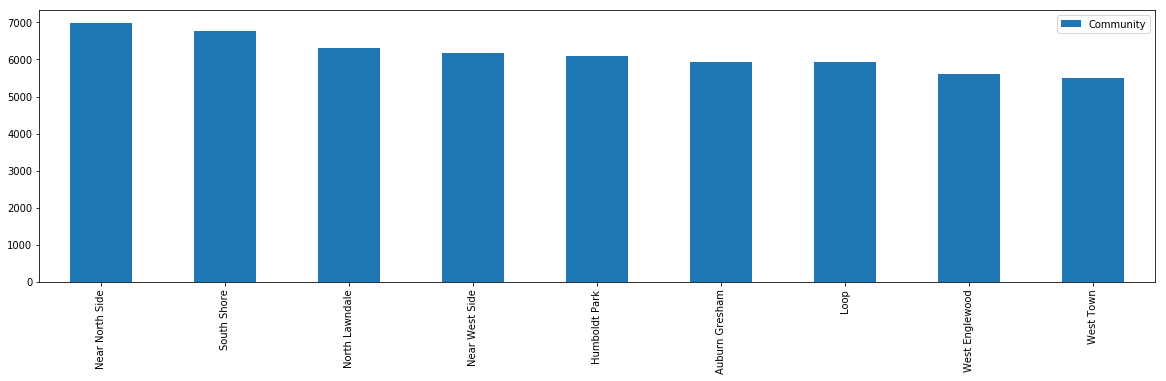

In [18]:
fig = plt.figure(figsize = (20,5))
most_arrests.plot(kind = 'bar',ax = plt.gca())

In [19]:
most_arrests

,Community
Near North Side,6981
South Shore,6758
North Lawndale,6313
Near West Side,6175
Humboldt Park,6092
Auburn Gresham,5942
Loop,5931
West Englewood,5605
West Town,5491


'Near North Side', 'South Shore', 'North Lawndale', 'Near West Side',
       'Humboldt Park', 'Auburn Gresham', 'Loop', 'West Englewood',
       'West Town' has the most arrests

3.what crime caused most of the arrests? 

In [20]:
most_crime = pd.DataFrame(md['Primary Type'].value_counts()[1:10])

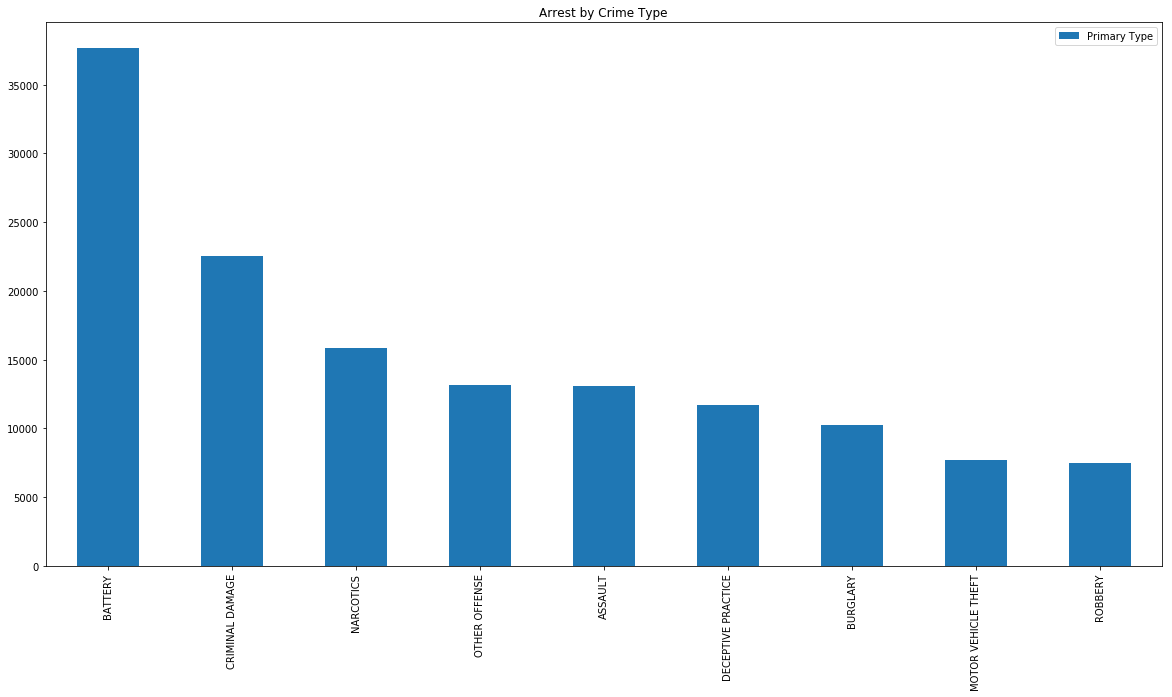

In [21]:
fig = plt.figure(figsize = (20,10))
most_crime.plot(kind = 'bar', title = 'Arrest by Crime Type', ax = plt.gca() )

In [22]:
most_crime[1:10]

,Primary Type
CRIMINAL DAMAGE,22553
NARCOTICS,15875
OTHER OFFENSE,13178
ASSAULT,13095
DECEPTIVE PRACTICE,11731
BURGLARY,10273
MOTOR VEHICLE THEFT,7675
ROBBERY,7522


In [23]:
most_crime.index[1:10]

Index(['CRIMINAL DAMAGE', 'NARCOTICS', 'OTHER OFFENSE', 'ASSAULT',
       'DECEPTIVE PRACTICE', 'BURGLARY', 'MOTOR VEHICLE THEFT', 'ROBBERY'],
      dtype='object')

'BATTERY', 'CRIMINAL DAMAGE', 'NARCOTICS', 'OTHER OFFENSE', 'ASSAULT',  'DECEPTIVE PRACTICE', 'BURGLARY', 'MOTOR VEHICLE THEFT', 'ROBBERY' caused caused most of the arrests

In [24]:
# Read the population data
population = pd.read_csv("Illinois_Population.csv")